# **IMPORTING LIBRARIES AND LOADING DATASET**

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
from google.colab import files
files_uplaoded= files.upload()

Saving seattle-weather.csv to seattle-weather (6).csv


In [139]:
df= pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# **DATA PRE-PROCESSING**

In [140]:
df['date'] = pd.to_datetime(df['date'])

# Split into separate columns
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [141]:
df

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,27,12,2015
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,28,12,2015
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,29,12,2015
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,30,12,2015


In [142]:
df= df.drop(columns=['date'])
df

,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,10.9,10.6,2.8,4.5,rain,2,1,2012
2,0.8,11.7,7.2,2.3,rain,3,1,2012
3,20.3,12.2,5.6,4.7,rain,4,1,2012
4,1.3,8.9,2.8,6.1,rain,5,1,2012
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,27,12,2015
1457,1.5,5.0,1.7,1.3,rain,28,12,2015
1458,0.0,7.2,0.6,2.6,fog,29,12,2015
1459,0.0,5.6,-1.0,3.4,sun,30,12,2015


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   day            1461 non-null   int32  
 6   month          1461 non-null   int32  
 7   year           1461 non-null   int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 74.3+ KB


In [144]:
unique_weather= pd.unique(df['weather'])
unique_weather

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [145]:
# Get value counts
class_counts = df['weather'].value_counts()

# Get majority and minority class sizes
majority = class_counts.max()
minority = class_counts.min()

# Calculate imbalance ratio
imbalance_ratio = majority / minority

print("Class Counts:\n", class_counts)
print(f"\nImbalance Ratio (majority / minority): {imbalance_ratio:.2f}")


Class Counts:
 weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Imbalance Ratio (majority / minority): 24.65


In [146]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['weather'], drop_first=True)
df

,precipitation,temp_max,temp_min,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,1,2012,False,False,False,False
1,10.9,10.6,2.8,4.5,2,1,2012,False,True,False,False
2,0.8,11.7,7.2,2.3,3,1,2012,False,True,False,False
3,20.3,12.2,5.6,4.7,4,1,2012,False,True,False,False
4,1.3,8.9,2.8,6.1,5,1,2012,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015,False,True,False,False
1457,1.5,5.0,1.7,1.3,28,12,2015,False,True,False,False
1458,0.0,7.2,0.6,2.6,29,12,2015,True,False,False,False
1459,0.0,5.6,-1.0,3.4,30,12,2015,False,False,False,True


In [147]:
df['weather_fog']= df['weather_fog'].astype(int)
df['weather_rain']= df['weather_rain'].astype(int)
df['weather_snow']= df['weather_snow'].astype(int)
df

,precipitation,temp_max,temp_min,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,1,2012,0,0,0,False
1,10.9,10.6,2.8,4.5,2,1,2012,0,1,0,False
2,0.8,11.7,7.2,2.3,3,1,2012,0,1,0,False
3,20.3,12.2,5.6,4.7,4,1,2012,0,1,0,False
4,1.3,8.9,2.8,6.1,5,1,2012,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015,0,1,0,False
1457,1.5,5.0,1.7,1.3,28,12,2015,0,1,0,False
1458,0.0,7.2,0.6,2.6,29,12,2015,1,0,0,False
1459,0.0,5.6,-1.0,3.4,30,12,2015,0,0,0,True


In [148]:
df['weather_sun']= df['weather_sun'].astype(int)
df

,precipitation,temp_max,temp_min,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,1,2012,0,0,0,0
1,10.9,10.6,2.8,4.5,2,1,2012,0,1,0,0
2,0.8,11.7,7.2,2.3,3,1,2012,0,1,0,0
3,20.3,12.2,5.6,4.7,4,1,2012,0,1,0,0
4,1.3,8.9,2.8,6.1,5,1,2012,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015,0,1,0,0
1457,1.5,5.0,1.7,1.3,28,12,2015,0,1,0,0
1458,0.0,7.2,0.6,2.6,29,12,2015,1,0,0,0
1459,0.0,5.6,-1.0,3.4,30,12,2015,0,0,0,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   day            1461 non-null   int32  
 5   month          1461 non-null   int32  
 6   year           1461 non-null   int32  
 7   weather_fog    1461 non-null   int64  
 8   weather_rain   1461 non-null   int64  
 9   weather_snow   1461 non-null   int64  
 10  weather_sun    1461 non-null   int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 108.6 KB


# **EDA AND FEATURE ENGINEERING**

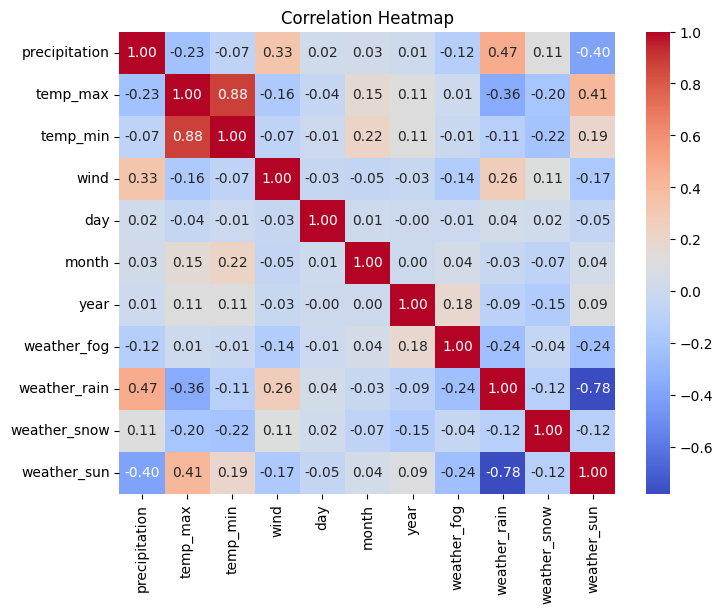

In [150]:
corr= df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [151]:
df['avg_temp']= (df['temp_max']+ df['temp_min'])/2
df['temp_range']=(df['temp_max']- df['temp_min'])
df

,precipitation,temp_max,temp_min,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun,avg_temp,temp_range
0,0.0,12.8,5.0,4.7,1,1,2012,0,0,0,0,8.90,7.8
1,10.9,10.6,2.8,4.5,2,1,2012,0,1,0,0,6.70,7.8
2,0.8,11.7,7.2,2.3,3,1,2012,0,1,0,0,9.45,4.5
3,20.3,12.2,5.6,4.7,4,1,2012,0,1,0,0,8.90,6.6
4,1.3,8.9,2.8,6.1,5,1,2012,0,1,0,0,5.85,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,27,12,2015,0,1,0,0,3.05,2.7
1457,1.5,5.0,1.7,1.3,28,12,2015,0,1,0,0,3.35,3.3
1458,0.0,7.2,0.6,2.6,29,12,2015,1,0,0,0,3.90,6.6
1459,0.0,5.6,-1.0,3.4,30,12,2015,0,0,0,1,2.30,6.6


In [152]:
df= df.drop(columns=['temp_max','temp_min'])
df

,precipitation,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun,avg_temp,temp_range
0,0.0,4.7,1,1,2012,0,0,0,0,8.90,7.8
1,10.9,4.5,2,1,2012,0,1,0,0,6.70,7.8
2,0.8,2.3,3,1,2012,0,1,0,0,9.45,4.5
3,20.3,4.7,4,1,2012,0,1,0,0,8.90,6.6
4,1.3,6.1,5,1,2012,0,1,0,0,5.85,6.1
...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,2.9,27,12,2015,0,1,0,0,3.05,2.7
1457,1.5,1.3,28,12,2015,0,1,0,0,3.35,3.3
1458,0.0,2.6,29,12,2015,1,0,0,0,3.90,6.6
1459,0.0,3.4,30,12,2015,0,0,0,1,2.30,6.6


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   wind           1461 non-null   float64
 2   day            1461 non-null   int32  
 3   month          1461 non-null   int32  
 4   year           1461 non-null   int32  
 5   weather_fog    1461 non-null   int64  
 6   weather_rain   1461 non-null   int64  
 7   weather_snow   1461 non-null   int64  
 8   weather_sun    1461 non-null   int64  
 9   avg_temp       1461 non-null   float64
 10  temp_range     1461 non-null   float64
dtypes: float64(4), int32(3), int64(4)
memory usage: 108.6 KB


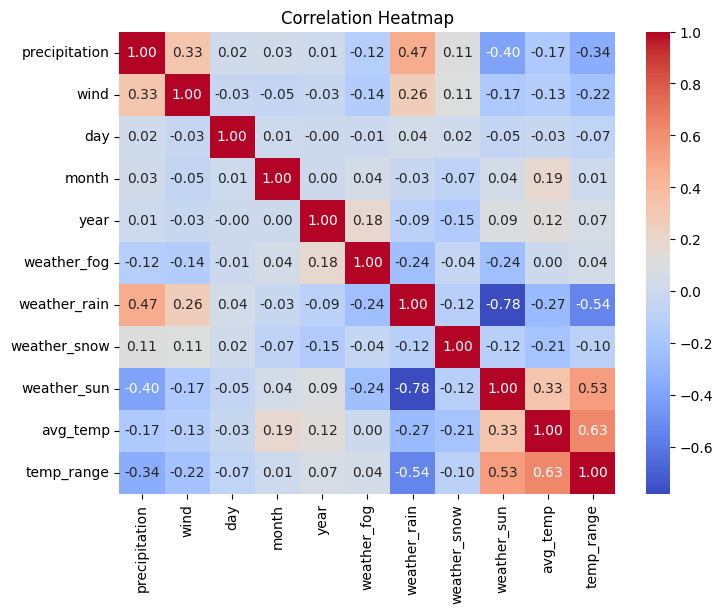

In [154]:
corr= df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame and precip_bin is a column you want to exclude

# Exclude 'precip_bin' from the numeric columns
numeric_features = df.select_dtypes(include=['number']).columns

# Remove 'precip_bin' if it exists in the list of numeric features
numeric_features = [col for col in numeric_features if col != 'precip_bin']

# Create a new dataframe for VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features  # Only include the remaining numeric features
vif_data["VIF"] = [variance_inflation_factor(df[numeric_features].values, i)
                   for i in range(len(numeric_features))]

# Display the VIF data
print(vif_data)


          Feature        VIF
0   precipitation   1.701864
1            wind   7.180201
2             day   4.231927
3           month   4.883435
4            year  47.744256
5     weather_fog   2.918321
6    weather_rain  14.242188
7    weather_snow   1.595989
8     weather_sun  13.376715
9        avg_temp   9.561812
10     temp_range  12.984167


In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   wind           1461 non-null   float64
 2   day            1461 non-null   int32  
 3   month          1461 non-null   int32  
 4   year           1461 non-null   int32  
 5   weather_fog    1461 non-null   int64  
 6   weather_rain   1461 non-null   int64  
 7   weather_snow   1461 non-null   int64  
 8   weather_sun    1461 non-null   int64  
 9   avg_temp       1461 non-null   float64
 10  temp_range     1461 non-null   float64
dtypes: float64(4), int32(3), int64(4)
memory usage: 108.6 KB


In [157]:
df

,precipitation,wind,day,month,year,weather_fog,weather_rain,weather_snow,weather_sun,avg_temp,temp_range
0,0.0,4.7,1,1,2012,0,0,0,0,8.90,7.8
1,10.9,4.5,2,1,2012,0,1,0,0,6.70,7.8
2,0.8,2.3,3,1,2012,0,1,0,0,9.45,4.5
3,20.3,4.7,4,1,2012,0,1,0,0,8.90,6.6
4,1.3,6.1,5,1,2012,0,1,0,0,5.85,6.1
...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,2.9,27,12,2015,0,1,0,0,3.05,2.7
1457,1.5,1.3,28,12,2015,0,1,0,0,3.35,3.3
1458,0.0,2.6,29,12,2015,1,0,0,0,3.90,6.6
1459,0.0,3.4,30,12,2015,0,0,0,1,2.30,6.6


In [158]:
df= df.drop(columns=['year','temp_range','weather_rain'])
df

,precipitation,wind,day,month,weather_fog,weather_snow,weather_sun,avg_temp
0,0.0,4.7,1,1,0,0,0,8.90
1,10.9,4.5,2,1,0,0,0,6.70
2,0.8,2.3,3,1,0,0,0,9.45
3,20.3,4.7,4,1,0,0,0,8.90
4,1.3,6.1,5,1,0,0,0,5.85
...,...,...,...,...,...,...,...,...
1456,8.6,2.9,27,12,0,0,0,3.05
1457,1.5,1.3,28,12,0,0,0,3.35
1458,0.0,2.6,29,12,1,0,0,3.90
1459,0.0,3.4,30,12,0,0,1,2.30


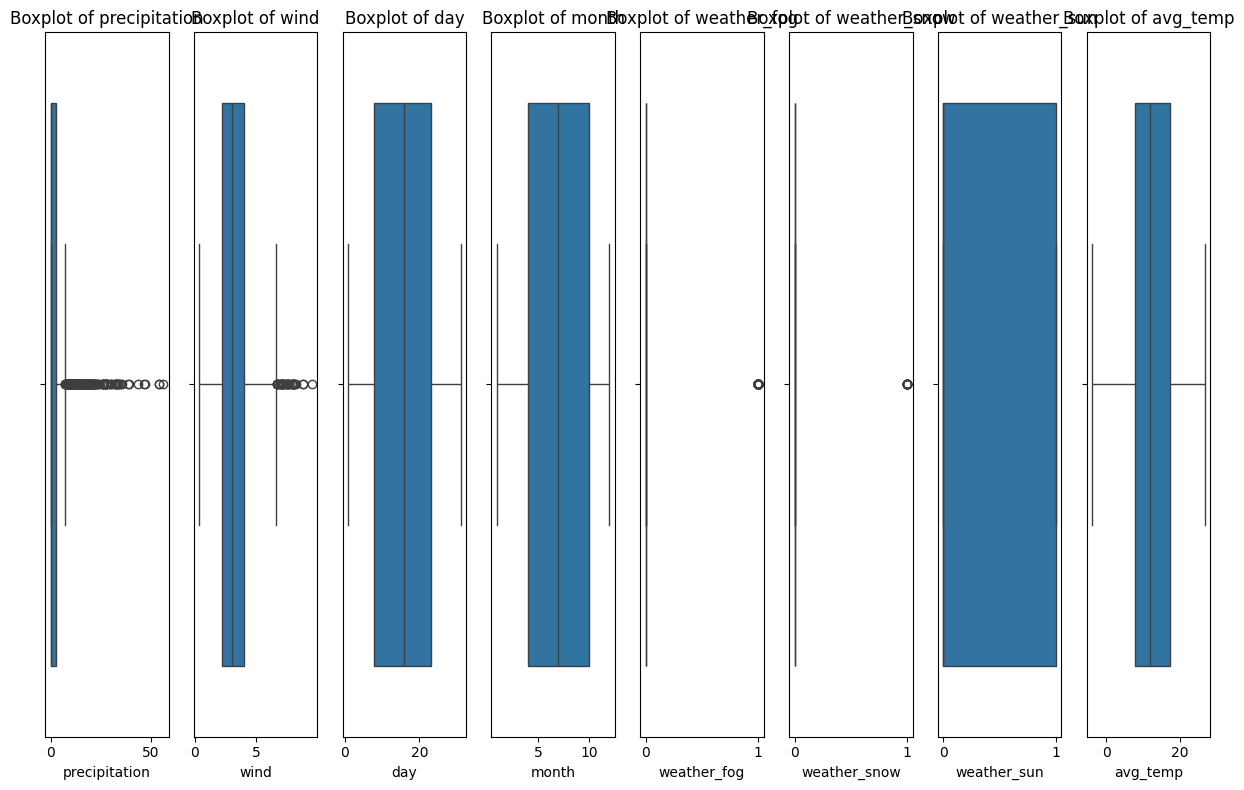

In [159]:
plt.figure(figsize=(12, 8))

# Loop through each numerical column in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i+1)  # Create a subplot for each column
    sns.boxplot(x=df[column])  # Create boxplot for the current column
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()  # Adjust subplots to fit

# Show the plot
plt.show()

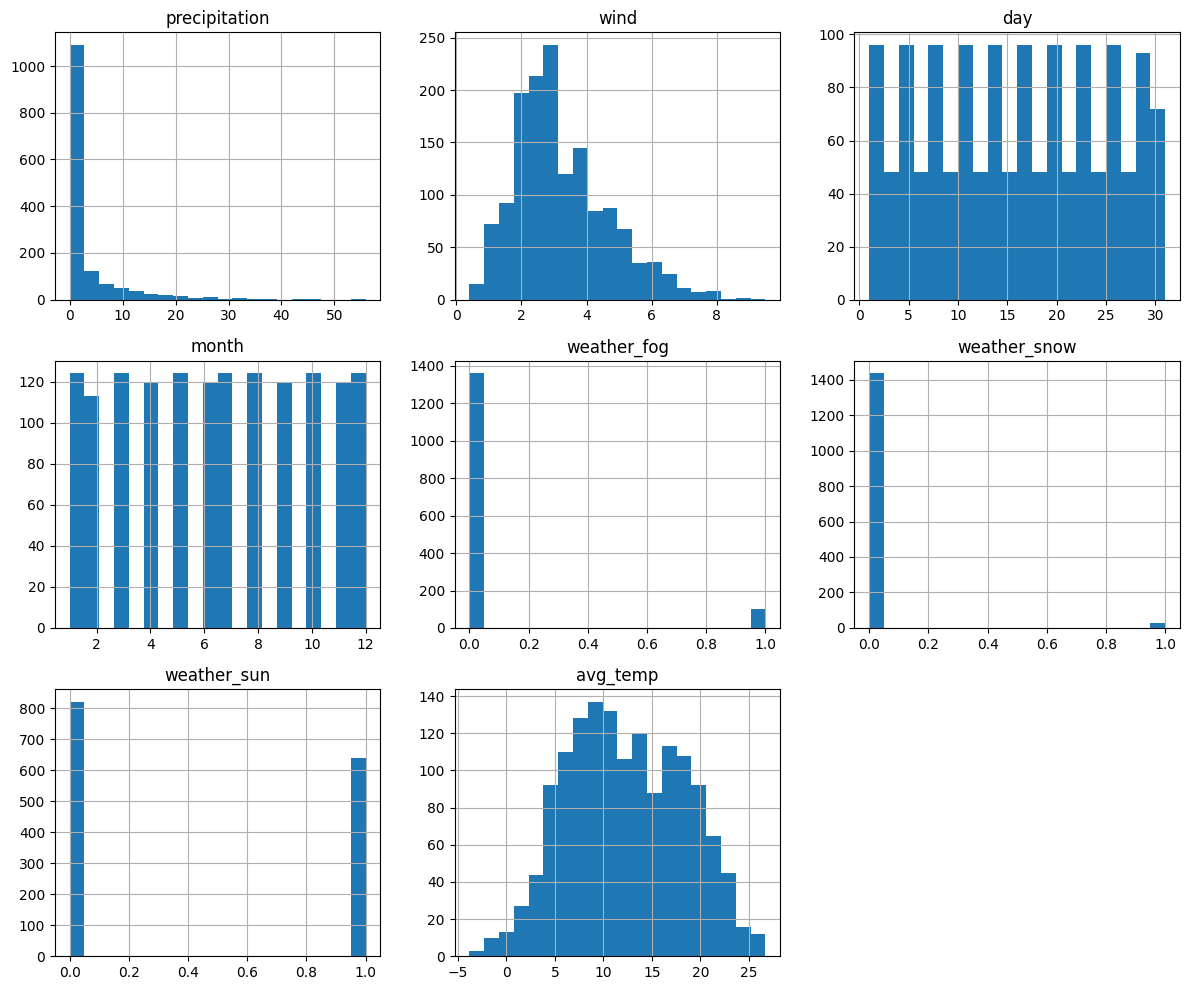

In [160]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()  # Adjust subplots to fit the figure area
plt.show()

# **OUTLIER REMOVAL AND DEFINING VARIABLES**

In [161]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Variables with visible outliers based on boxplots
outlier_cols = ['precipitation','wind','weather_fog','weather_snow']

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Calculate outlier boundaries
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove rows containing outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply outlier removal
df_cleaned = remove_outliers(df, outlier_cols)

# Display the new dataset size after outlier removal
print(f"Dataset size after outlier removal: {df_cleaned.shape}")

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

print("Outliers removed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'")


Dataset size after outlier removal: (1099, 8)
Outliers removed successfully. Cleaned dataset saved as 'cleaned_dataset.csv'


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   wind           1461 non-null   float64
 2   day            1461 non-null   int32  
 3   month          1461 non-null   int32  
 4   weather_fog    1461 non-null   int64  
 5   weather_snow   1461 non-null   int64  
 6   weather_sun    1461 non-null   int64  
 7   avg_temp       1461 non-null   float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 80.0 KB


In [163]:
# Select numerical columns for independent variables (X)
X = df.select_dtypes(include=['int64','float64','int8']).drop(columns=['precipitation'])  # Exclude the target column if it's in numerical format

# Select the dependent variable (y)
y = df['precipitation']  # Target variable (popularity category)

# Display the resulting datasets
print("Independent Variables (X):")
print(X.head())
print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   wind  weather_fog  weather_snow  weather_sun  avg_temp
0   4.7            0             0            0      8.90
1   4.5            0             0            0      6.70
2   2.3            0             0            0      9.45
3   4.7            0             0            0      8.90
4   6.1            0             0            0      5.85

Dependent Variable (y):
0     0.0
1    10.9
2     0.8
3    20.3
4     1.3
Name: precipitation, dtype: float64


# **TRAIN-TEST SPLIT**

In [164]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.4, random_state=42)


# **80-20 SPLIT**

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 2: Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [6, 8, 10, 12],  # Try deeper trees
    'min_samples_split': [2, 10, 30],  # Try more splits
    'min_samples_leaf': [5, 10, 15],  # Try smaller leaf nodes
    'max_features': [0.5, 0.7, 1.0],  # Try more features per split
}

# Step 3: Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_1, y_train_1)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Step 4: Train the best model
best_dt_model.fit(X_train_1, y_train_1)

# Step 5: Make Predictions
y_pred = best_dt_model.predict(X_test_1)

# Step 6: Evaluate the Model Performance
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
mae = mean_absolute_error(y_test_1, y_pred)
print(f"✅ Final Decision Tree RMSE (After Hyperparameter Tuning): {rmse:.4f}")
print(f"✅ Final Decision Tree MAE: {mae:.4f}")

# R-squared
r2 = r2_score(y_test_1, y_pred)
print(f"✅ Final Decision Tree R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE (optional)
cv_scores = cross_val_score(best_dt_model, X_train_1, y_train_1, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Decision Tree): {cv_rmse_scores.mean():.4f}")


✅ Final Decision Tree RMSE (After Hyperparameter Tuning): 5.7106
✅ Final Decision Tree MAE: 2.8680
✅ Final Decision Tree R-squared: 0.1600
📉 Cross-validation RMSE (Decision Tree): 5.8803


# **XG BOOST**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize base model
xgb = XGBRegressor(random_state=42)

# Optimized (smaller) parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Reduced from 3 to 2
    'learning_rate': [0.05, 0.1],        # Most practical values
    'max_depth': [4, 6],                 # Avoid very deep trees
    'subsample': [0.8],                  # Common safe default
    'colsample_bytree': [0.8],           # Common safe default
    'reg_lambda': [1],                   # L2 regularization
    'reg_alpha': [0]                     # L1 regularization off
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                                 # Reduced CV folds from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# Fit model
grid_search.fit(X_train_1, y_train_1)
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_model.predict(X_test_1)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
mae = mean_absolute_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

print(f"✅ XGBoost RMSE (Tuned): {rmse:.4f}")
print(f"✅ XGBoost MAE: {mae:.4f}")
print(f"✅ XGBoost R-squared: {r2:.4f}")


✅ XGBoost RMSE (Tuned): 5.4399
✅ XGBoost MAE: 2.9276
✅ XGBoost R-squared: 0.2378


# **ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_1.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model with MAE as an additional metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (optimized: fewer epochs, larger batch size)
model.fit(X_train_1, y_train_1, epochs=50, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test_1)

# Flatten predictions (Keras outputs 2D)
y_pred = y_pred.flatten()

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
mae = mean_absolute_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

print(f"✅ ANN RMSE: {rmse:.4f}")
print(f"✅ ANN MAE: {mae:.4f}")
print(f"✅ ANN R-squared: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
✅ ANN RMSE: 5.4730
✅ ANN MAE: 3.0636
✅ ANN R-squared: 0.2285


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Adjusting Random Forest hyperparameters
rf_regressor_model = RandomForestRegressor(
    n_estimators=100,           # Increased number of trees
    max_depth=10,               # Increased max depth
    min_samples_split=10,       # Lowered split value
    min_samples_leaf=5,         # Lowered leaf size
    max_features='sqrt',        # Using sqrt of total features
    random_state=42
)

# Train the model
rf_regressor_model.fit(X_train_selected, y_train_1)

# Make Predictions
y_pred = rf_regressor_model.predict(X_test_selected)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
print(f"✅ Final Random Forest RMSE (Optimized): {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test_1, y_pred)
print(f"✅ Final Random Forest MAE (Optimized): {mae:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_1, y_pred)
print(f"✅ Final Random Forest R-squared (Optimized): {r2:.4f}")

# Cross-validation RMSE
cv_scores = cross_val_score(rf_regressor_model, X_train_selected, y_train_1, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Optimized): {cv_rmse_scores.mean():.4f}")


✅ Final Random Forest RMSE (Optimized): 5.2933
✅ Final Random Forest MAE (Optimized): 2.7261
✅ Final Random Forest R-squared (Optimized): 0.2783
📉 Cross-validation RMSE (Optimized): 5.8532


# **SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Step 3: Initialize the SVR model with light tuning
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)  # Slightly higher C and specific gamma

# Step 4: Train the SVR model
svr_model.fit(X_train_scaled, y_train_1)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred))
mae = mean_absolute_error(y_test_1, y_pred)
r2 = r2_score(y_test_1, y_pred)

print(f"✅ Final SVR RMSE: {rmse:.4f}")
print(f"✅ Final SVR MAE: {mae:.4f}")
print(f"✅ Final SVR R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_1, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"📉 Cross-validation RMSE (SVR): {cv_rmse_scores.mean():.4f}")


✅ Final SVR RMSE: 5.4852
✅ Final SVR MAE: 2.3575
✅ Final SVR R-squared: 0.2250
📉 Cross-validation RMSE (SVR): 5.9278


# **75-25 SPLIT**

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 2: Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [6, 8, 10, 12],  # Try deeper trees
    'min_samples_split': [2, 10, 30],  # Try more splits
    'min_samples_leaf': [5, 10, 15],  # Try smaller leaf nodes
    'max_features': [0.5, 0.7, 1.0],  # Try more features per split
}

# Step 3: Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_2, y_train_2)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Step 4: Train the best model
best_dt_model.fit(X_train_2, y_train_2)

# Step 5: Make Predictions
y_pred = best_dt_model.predict(X_test_2)

# Step 6: Evaluate the Model Performance
rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
mae = mean_absolute_error(y_test_2, y_pred)
print(f"✅ Final Decision Tree RMSE (After Hyperparameter Tuning): {rmse:.4f}")
print(f"✅ Final Decision Tree MAE: {mae:.4f}")

# R-squared
r2 = r2_score(y_test_2, y_pred)
print(f"✅ Final Decision Tree R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE (optional)
cv_scores = cross_val_score(best_dt_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Decision Tree): {cv_rmse_scores.mean():.4f}")


✅ Final Decision Tree RMSE (After Hyperparameter Tuning): 5.4540
✅ Final Decision Tree MAE: 2.6988
✅ Final Decision Tree R-squared: 0.2219
📉 Cross-validation RMSE (Decision Tree): 5.9477


# **XG BOOST**

In [165]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize base model
xgb = XGBRegressor(random_state=42)

# Optimized (smaller) parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Reduced from 3 to 2
    'learning_rate': [0.05, 0.1],        # Most practical values
    'max_depth': [4, 6],                 # Avoid very deep trees
    'subsample': [0.8],                  # Common safe default
    'colsample_bytree': [0.8],           # Common safe default
    'reg_lambda': [1],                   # L2 regularization
    'reg_alpha': [0]                     # L1 regularization off
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                                 # Reduced CV folds from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# Fit model
grid_search.fit(X_train_2, y_train_2)
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_model.predict(X_test_2)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
mae = mean_absolute_error(y_test_2, y_pred)
r2 = r2_score(y_test_2, y_pred)

print(f"✅ XGBoost RMSE (Tuned): {rmse:.4f}")
print(f"✅ XGBoost MAE: {mae:.4f}")
print(f"✅ XGBoost R-squared: {r2:.4f}")


✅ XGBoost RMSE (Tuned): 5.1184
✅ XGBoost MAE: 2.7476
✅ XGBoost R-squared: 0.3147


# **ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_2.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model with MAE as an additional metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (optimized: fewer epochs, larger batch size)
model.fit(X_train_2, y_train_2, epochs=50, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test_2)

# Flatten predictions (Keras outputs 2D)
y_pred = y_pred.flatten()

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
mae = mean_absolute_error(y_test_2, y_pred)
r2 = r2_score(y_test_2, y_pred)

print(f"✅ ANN RMSE: {rmse:.4f}")
print(f"✅ ANN MAE: {mae:.4f}")
print(f"✅ ANN R-squared: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
✅ ANN RMSE: 5.2977
✅ ANN MAE: 2.7708
✅ ANN R-squared: 0.2658


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Adjusting Random Forest hyperparameters
rf_regressor_model = RandomForestRegressor(
    n_estimators=100,           # Increased number of trees
    max_depth=10,               # Increased max depth
    min_samples_split=10,       # Lowered split value
    min_samples_leaf=5,         # Lowered leaf size
    max_features='sqrt',        # Using sqrt of total features
    random_state=42
)

# Train the model
rf_regressor_model.fit(X_train_2, y_train_2)

# Make Predictions
y_pred = rf_regressor_model.predict(X_test_2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
print(f"✅ Final Random Forest RMSE (Optimized): {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test_2, y_pred)
print(f"✅ Final Random Forest MAE (Optimized): {mae:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_2, y_pred)
print(f"✅ Final Random Forest R-squared (Optimized): {r2:.4f}")

# Cross-validation RMSE
cv_scores = cross_val_score(rf_regressor_model, X_train_2, y_train_2, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Optimized): {cv_rmse_scores.mean():.4f}")


✅ Final Random Forest RMSE (Optimized): 5.2369
✅ Final Random Forest MAE (Optimized): 2.7467
✅ Final Random Forest R-squared (Optimized): 0.2826
📉 Cross-validation RMSE (Optimized): 5.8666


# **SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Step 3: Initialize the SVR model with light tuning
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)  # Slightly higher C and specific gamma

# Step 4: Train the SVR model
svr_model.fit(X_train_scaled, y_train_2)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test_2, y_pred))
mae = mean_absolute_error(y_test_2, y_pred)
r2 = r2_score(y_test_2, y_pred)

print(f"✅ Final SVR RMSE: {rmse:.4f}")
print(f"✅ Final SVR MAE: {mae:.4f}")
print(f"✅ Final SVR R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_2, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"📉 Cross-validation RMSE (SVR): {cv_rmse_scores.mean():.4f}")


✅ Final SVR RMSE: 5.4526
✅ Final SVR MAE: 2.3378
✅ Final SVR R-squared: 0.2223
📉 Cross-validation RMSE (SVR): 6.1439


# **70-30 SPLIT**

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 2: Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [6, 8, 10, 12],  # Try deeper trees
    'min_samples_split': [2, 10, 30],  # Try more splits
    'min_samples_leaf': [5, 10, 15],  # Try smaller leaf nodes
    'max_features': [0.5, 0.7, 1.0],  # Try more features per split
}

# Step 3: Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_3, y_train_3)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Step 4: Train the best model
best_dt_model.fit(X_train_3, y_train_3)

# Step 5: Make Predictions
y_pred = best_dt_model.predict(X_test_3)

# Step 6: Evaluate the Model Performance
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
mae = mean_absolute_error(y_test_3, y_pred)
print(f"✅ Final Decision Tree RMSE (After Hyperparameter Tuning): {rmse:.4f}")
print(f"✅ Final Decision Tree MAE: {mae:.4f}")

# R-squared
r2 = r2_score(y_test_3, y_pred)
print(f"✅ Final Decision Tree R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE (optional)
cv_scores = cross_val_score(best_dt_model, X_train_3, y_train_3, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Decision Tree): {cv_rmse_scores.mean():.4f}")


✅ Final Decision Tree RMSE (After Hyperparameter Tuning): 5.5840
✅ Final Decision Tree MAE: 2.7218
✅ Final Decision Tree R-squared: 0.3108
📉 Cross-validation RMSE (Decision Tree): 5.8233


# **XG BOOST**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize base model
xgb = XGBRegressor(random_state=42)

# Optimized (smaller) parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Reduced from 3 to 2
    'learning_rate': [0.05, 0.1],        # Most practical values
    'max_depth': [4, 6],                 # Avoid very deep trees
    'subsample': [0.8],                  # Common safe default
    'colsample_bytree': [0.8],           # Common safe default
    'reg_lambda': [1],                   # L2 regularization
    'reg_alpha': [0]                     # L1 regularization off
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                                 # Reduced CV folds from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# Fit model
grid_search.fit(X_train_3, y_train_3)
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_model.predict(X_test_3)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
mae = mean_absolute_error(y_test_3, y_pred)
r2 = r2_score(y_test_3, y_pred)

print(f"✅ XGBoost RMSE (Tuned): {rmse:.4f}")
print(f"✅ XGBoost MAE: {mae:.4f}")
print(f"✅ XGBoost R-squared: {r2:.4f}")


✅ XGBoost RMSE (Tuned): 5.7553
✅ XGBoost MAE: 2.9239
✅ XGBoost R-squared: 0.2678


# **ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_3.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model with MAE as an additional metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (optimized: fewer epochs, larger batch size)
model.fit(X_train_3, y_train_3, epochs=50, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test_3)

# Flatten predictions (Keras outputs 2D)
y_pred = y_pred.flatten()

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
mae = mean_absolute_error(y_test_3, y_pred)
r2 = r2_score(y_test_3, y_pred)

print(f"✅ ANN RMSE: {rmse:.4f}")
print(f"✅ ANN MAE: {mae:.4f}")
print(f"✅ ANN R-squared: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
✅ ANN RMSE: 5.7141
✅ ANN MAE: 2.9824
✅ ANN R-squared: 0.2783


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Adjusting Random Forest hyperparameters
rf_regressor_model = RandomForestRegressor(
    n_estimators=100,           # Increased number of trees
    max_depth=10,               # Increased max depth
    min_samples_split=10,       # Lowered split value
    min_samples_leaf=5,         # Lowered leaf size
    max_features='sqrt',        # Using sqrt of total features
    random_state=42
)

# Train the model
rf_regressor_model.fit(X_train_3, y_train_3)

# Make Predictions
y_pred = rf_regressor_model.predict(X_test_3)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
print(f"✅ Final Random Forest RMSE (Optimized): {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test_3, y_pred)
print(f"✅ Final Random Forest MAE (Optimized): {mae:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_3, y_pred)
print(f"✅ Final Random Forest R-squared (Optimized): {r2:.4f}")

# Cross-validation RMSE
cv_scores = cross_val_score(rf_regressor_model, X_train_3, y_train_3, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Optimized): {cv_rmse_scores.mean():.4f}")


✅ Final Random Forest RMSE (Optimized): 5.7755
✅ Final Random Forest MAE (Optimized): 2.8573
✅ Final Random Forest R-squared (Optimized): 0.2627
📉 Cross-validation RMSE (Optimized): 5.7221


# **SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_3)
X_test_scaled = scaler.transform(X_test_3)

# Step 3: Initialize the SVR model with light tuning
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)  # Slightly higher C and specific gamma

# Step 4: Train the SVR model
svr_model.fit(X_train_scaled, y_train_3)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
mae = mean_absolute_error(y_test_3, y_pred)
r2 = r2_score(y_test_3, y_pred)

print(f"✅ Final SVR RMSE: {rmse:.4f}")
print(f"✅ Final SVR MAE: {mae:.4f}")
print(f"✅ Final SVR R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_3, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"📉 Cross-validation RMSE (SVR): {cv_rmse_scores.mean():.4f}")


✅ Final SVR RMSE: 5.9804
✅ Final SVR MAE: 2.4715
✅ Final SVR R-squared: 0.2094
📉 Cross-validation RMSE (SVR): 5.9372


# **60-40 SPLIT**

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 2: Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [6, 8, 10, 12],  # Try deeper trees
    'min_samples_split': [2, 10, 30],  # Try more splits
    'min_samples_leaf': [5, 10, 15],  # Try smaller leaf nodes
    'max_features': [0.5, 0.7, 1.0],  # Try more features per split
}

# Step 3: Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_4, y_train_4)

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Step 4: Train the best model
best_dt_model.fit(X_train_4, y_train_4)

# Step 5: Make Predictions
y_pred = best_dt_model.predict(X_test_4)

# Step 6: Evaluate the Model Performance
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
mae = mean_absolute_error(y_test_4, y_pred)
print(f"✅ Final Decision Tree RMSE (After Hyperparameter Tuning): {rmse:.4f}")
print(f"✅ Final Decision Tree MAE: {mae:.4f}")

# R-squared
r2 = r2_score(y_test_4, y_pred)
print(f"✅ Final Decision Tree R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE (optional)
cv_scores = cross_val_score(best_dt_model, X_train_4, y_train_4, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Decision Tree): {cv_rmse_scores.mean():.4f}")


✅ Final Decision Tree RMSE (After Hyperparameter Tuning): 5.7968
✅ Final Decision Tree MAE: 2.8774
✅ Final Decision Tree R-squared: 0.2564
📉 Cross-validation RMSE (Decision Tree): 5.7943


# **XGBOOST**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize base model
xgb = XGBRegressor(random_state=42)

# Optimized (smaller) parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Reduced from 3 to 2
    'learning_rate': [0.05, 0.1],        # Most practical values
    'max_depth': [4, 6],                 # Avoid very deep trees
    'subsample': [0.8],                  # Common safe default
    'colsample_bytree': [0.8],           # Common safe default
    'reg_lambda': [1],                   # L2 regularization
    'reg_alpha': [0]                     # L1 regularization off
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                                 # Reduced CV folds from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# Fit model
grid_search.fit(X_train_4, y_train_4)
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_model.predict(X_test_4)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
mae = mean_absolute_error(y_test_4, y_pred)
r2 = r2_score(y_test_4, y_pred)

print(f"✅ XGBoost RMSE (Tuned): {rmse:.4f}")
print(f"✅ XGBoost MAE: {mae:.4f}")
print(f"✅ XGBoost R-squared: {r2:.4f}")


✅ XGBoost RMSE (Tuned): 5.7893
✅ XGBoost MAE: 2.9548
✅ XGBoost R-squared: 0.2583


# **ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_4.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model with MAE as an additional metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (optimized: fewer epochs, larger batch size)
model.fit(X_train_4, y_train_4, epochs=50, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test_4)

# Flatten predictions (Keras outputs 2D)
y_pred = y_pred.flatten()

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
mae = mean_absolute_error(y_test_4, y_pred)
r2 = r2_score(y_test_4, y_pred)

print(f"✅ ANN RMSE: {rmse:.4f}")
print(f"✅ ANN MAE: {mae:.4f}")
print(f"✅ ANN R-squared: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ ANN RMSE: 5.6407
✅ ANN MAE: 2.8760
✅ ANN R-squared: 0.2959


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Adjusting Random Forest hyperparameters
rf_regressor_model = RandomForestRegressor(
    n_estimators=100,           # Increased number of trees
    max_depth=10,               # Increased max depth
    min_samples_split=10,       # Lowered split value
    min_samples_leaf=5,         # Lowered leaf size
    max_features='sqrt',        # Using sqrt of total features
    random_state=42
)

# Train the model
rf_regressor_model.fit(X_train_4, y_train_4)

# Make Predictions
y_pred = rf_regressor_model.predict(X_test_4)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
print(f"✅ Final Random Forest RMSE (Optimized): {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test_4, y_pred)
print(f"✅ Final Random Forest MAE (Optimized): {mae:.4f}")

# Calculate R-squared
r2 = r2_score(y_test_4, y_pred)
print(f"✅ Final Random Forest R-squared (Optimized): {r2:.4f}")

# Cross-validation RMSE
cv_scores = cross_val_score(rf_regressor_model, X_train_4, y_train_4, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE
print(f"📉 Cross-validation RMSE (Optimized): {cv_rmse_scores.mean():.4f}")


✅ Final Random Forest RMSE (Optimized): 5.7668
✅ Final Random Forest MAE (Optimized): 2.9021
✅ Final Random Forest R-squared (Optimized): 0.2641
📉 Cross-validation RMSE (Optimized): 5.7104


# **SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_4)
X_test_scaled = scaler.transform(X_test_4)

# Step 3: Initialize the SVR model with light tuning
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)  # Slightly higher C and specific gamma

# Step 4: Train the SVR model
svr_model.fit(X_train_scaled, y_train_4)

# Step 5: Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Step 6: Evaluate Performance
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
mae = mean_absolute_error(y_test_4, y_pred)
r2 = r2_score(y_test_4, y_pred)

print(f"✅ Final SVR RMSE: {rmse:.4f}")
print(f"✅ Final SVR MAE: {mae:.4f}")
print(f"✅ Final SVR R-squared: {r2:.4f}")

# Step 7: Cross-validation RMSE
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_4, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"📉 Cross-validation RMSE (SVR): {cv_rmse_scores.mean():.4f}")


✅ Final SVR RMSE: 6.0646
✅ Final SVR MAE: 2.5400
✅ Final SVR R-squared: 0.1861
📉 Cross-validation RMSE (SVR): 5.9127


# **REAL TIME PREDICTION**

In [172]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

def real_time_weather_prediction(input_features, model):
    """
    Predicts precipitation (continuous value) using a pre-trained XGBoost regression model.

    Parameters:
        input_features (list): A list of feature values in the following order:
            [wind, weather_fog, weather_snow, weather_sun, avg_temp]
        model (XGBRegressor): Pre-trained XGBoost model.

    Returns:
        float: Predicted precipitation in millimeters (mm).
    """
    # Define the feature columns (order must match the model's expected feature order)
    columns = ['wind', 'weather_fog', 'weather_snow', 'weather_sun', 'avg_temp']

    # Convert the input to a DataFrame
    input_df = pd.DataFrame([input_features], columns=columns)

    # Get the predicted precipitation from the model
    prediction = model.predict(input_df)[0]

    return prediction

# === Example Usage ===
# Assuming your model is already trained and ready:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_2, y_train_2)

# === Real-time Input ===
new_weather_input = [3.4, 0, 0, 1, 40]  # Example: 12 km/h wind, snow, no fog, no sun, 20.5°C avg temperature

# === Get Real-Time Prediction ===
predicted_precipitation = real_time_weather_prediction(new_weather_input, xgb_model)
print(f"🌧️ Predicted Precipitation: {predicted_precipitation:.2f} mm")


🌧️ Predicted Precipitation: -0.18 mm
